In [1]:
# %pip install opencv-python
# %pip install --upgrade numpy

In [2]:
# utility libraries
import numpy as np
import cv2
import sys
from skimage import io
# import preprocessing module
sys.path.append('../')
from Preprocessing import preprocessing as pp

In [6]:
def extract_roi(edge_image, colored_image):
  """
  Extracts the region of interest (ROI) from an edge-filtered image.

  Args:
      edge_image: A grayscale image with edges detected.

  Returns:
      A list of tuples, where each tuple contains the following information for an ROI:
          - (x_min, y_min): Coordinates of the top-left corner.
          - (x_max, y_max): Coordinates of the bottom-right corner.
          - normalized_signature: Normalized signature of the ROI.
          - shape_type: Type of shape detected (e.g., "circle").
  """
  edge_image  = (edge_image * 255).astype('uint8')

  # Find contours in the edge image
  # mode: cv2.RETR_EXTERNAL retrieves only the extreme outer contours (boundries) and ignore nested inside contours

  # When you detect contours in an image, each contour is a list of points that form the boundary of the object. However,
  # not all of these points are always necessary to accurately describe the shape. 
  # `cv2.CHAIN_APPROX_SIMPLE` is an algorithm that reduces the number of points in the contour. It removes all redundant 
  # points and compresses the contour, thereby saving memory.
  # It does this by storing only the end points of the horizontal, vertical, and diagonal line segments that make up the contour. 

  # contours: list of contours where each contour is a Numpy array of (x, y) coordinates of boundary points of the object
  contours, hierarchy = cv2.findContours(edge_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)



  # List to store extracted ROIs
  extracted_rois = []

  # Minimum area threshold to avoid small objects and retrieve only potential ROIs
  min_area = 200
  circ_contours = []

  # Iterate through each contour
  for contour in contours:
    # Calculate area of the contour
    area = cv2.contourArea(contour)

    # Skip small contours
    if area < min_area:
      continue
    

    # Gets the smallest possible circle that encloses the contour with its centroid and radius
    centroid, radius = cv2.minEnclosingCircle(contour)

    # Get bounding rectangle of the contour
    # x, y: Coordinates of the top-left corner
    # w, h: Width and height of the rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate the area of the enclosing circle
    circle_area = np.pi * (radius ** 2)

    # add the contour to the list of circle contours
    if  np.isclose(area, circle_area, rtol=0.2):  # 30% tolerance
        check = False
        # for i in range(len(circ_contours)):
        # #     if np.isclose(centroid[0] - circ_contours[i][0], 0, atol=2) and np.isclose(centroid[1] - circ_contours[i][1], 0, atol=2):
        # #         check = True
        # # if(check):
        # #     continue
        # # cv2.rectangle(colored_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # circ_contours.append(centroid)

        # img_copy = colored_image.copy()
        # # Create an empty mask
        # mask = np.zeros_like(img_copy)
        # # Draw the contour on the mask
        # cv2.drawContours(mask, [contour], 0, (255, 255, 255), thickness=cv2.FILLED)
        # # Invert the mask (to keep the area inside the contour)
        # mask_inv = cv2.bitwise_not(mask)
        # # Set all areas outside the contour to white
        # result = cv2.bitwise_and(img_copy, mask)
        # result += mask_inv
        # Use the bounding rectangle coordinates to create the sub-image
        sub_image = colored_image[y:y+h, x:x+w]
        # cv2.rectangle(colored_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # # Create the Gaussian blur
        # gauss = cv2.GaussianBlur(sub_image, (9,9), 10.0)
        # # Create the unsharp image by subtracting the Gaussian blur
        # unsharp_image = cv2.addWeighted(sub_image, 1.5, gauss, -0.5, 0, sub_image)

        # Store extracted ROI information
        extracted_rois.append(sub_image)

  # Return the list of extracted ROIs
  return extracted_rois

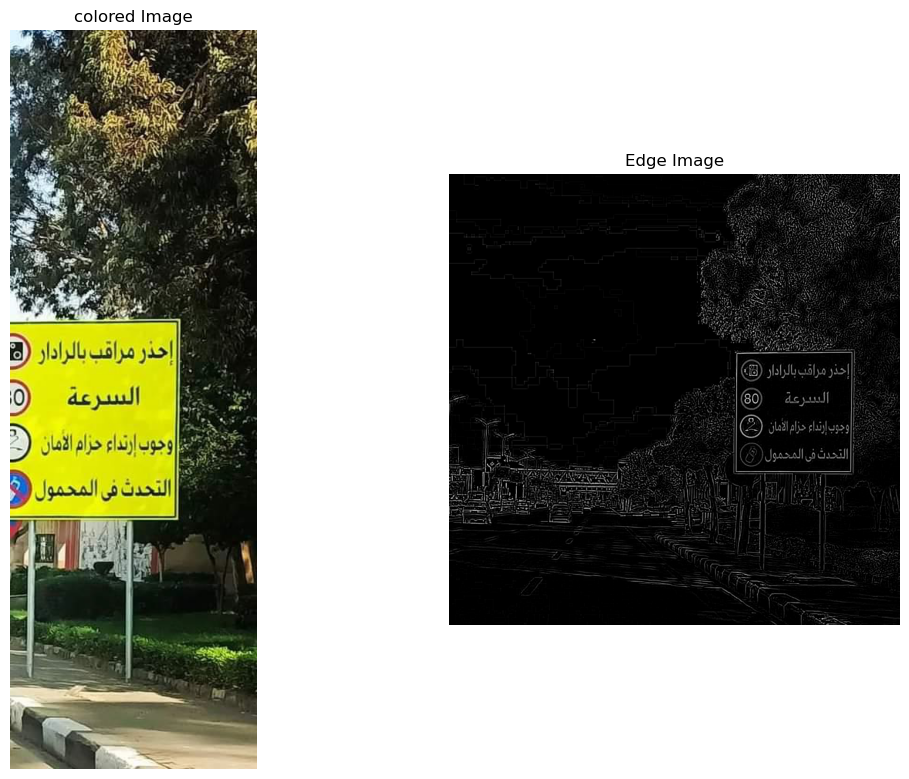

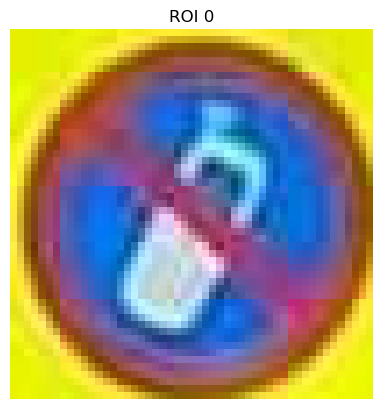

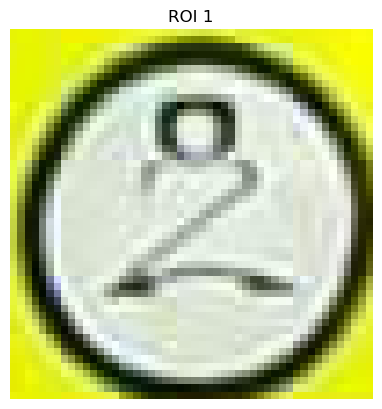

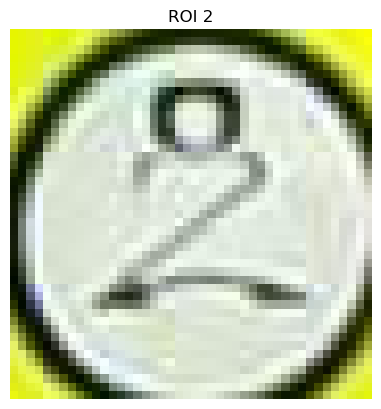

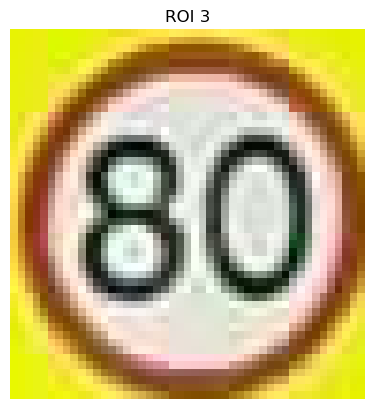

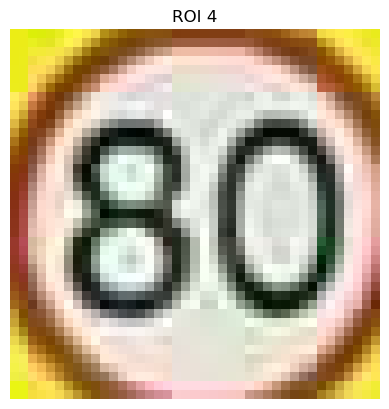

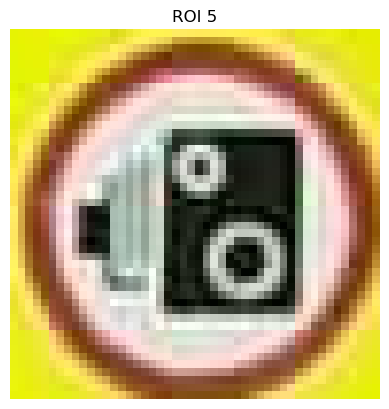

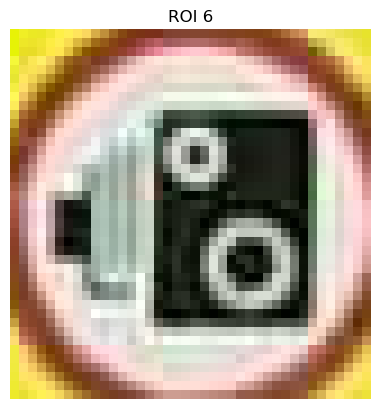

In [7]:
'''
Testing
'''
# Load the image
image = io.imread("../dataset/pp/testcase6.jpg")

img = image[:, 2 * (image.shape[1] // 3):]
# img = img[img.shape[0] // 3: 2 * (img.shape[0] // 3), :]

# Convert the image to grayscale
gray_image = pp.gray_image(image)

afterGamma = pp.HistogramEqualization(gray_image)  

# Apply edge detection
edge_image = pp.LoGEdgeDetection(afterGamma)

pp.show_images([img, edge_image], ["colored Image", "Edge Image"])


In [11]:

# Extract ROIs
rois = extract_roi(edge_image, image.copy())


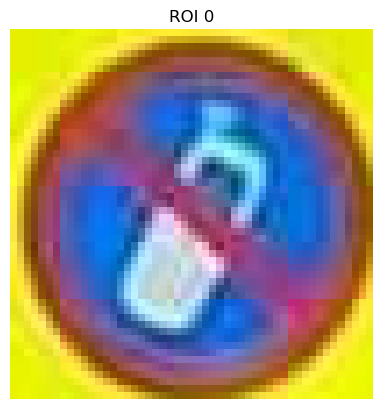

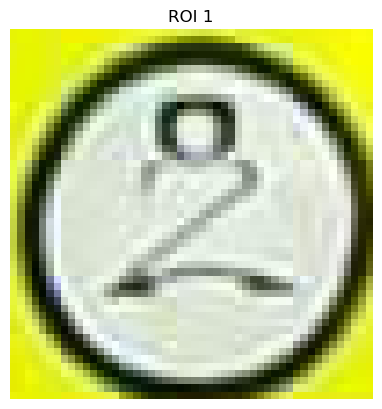

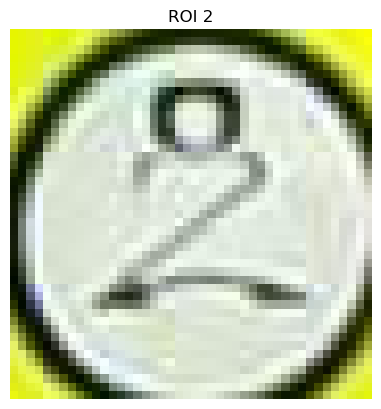

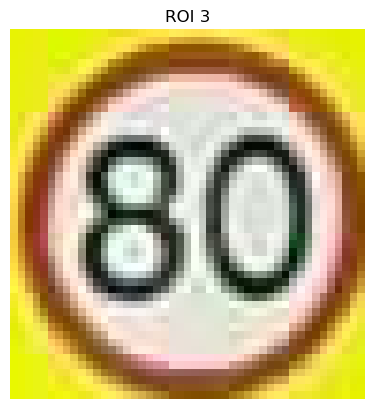

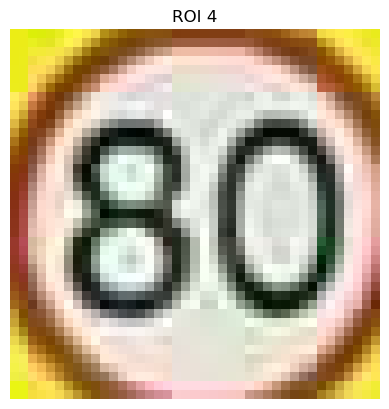

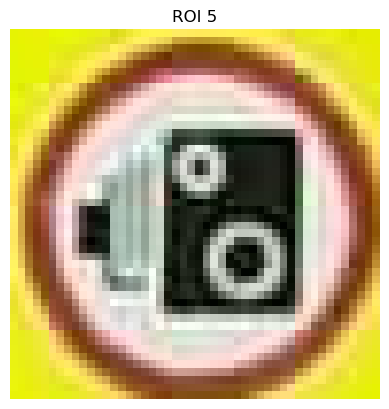

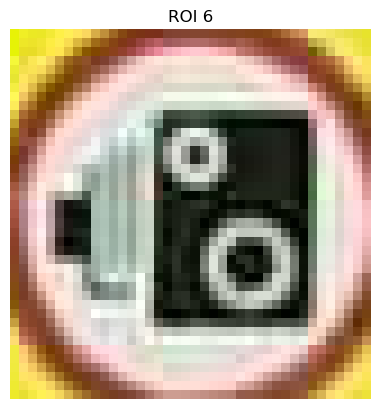

In [12]:

for i in range(len(rois)):
  pp.show_images([rois[i]], [f"ROI {i}"])